# Project Proposal
### Group Members: Sadia, Youjung, Adam

In [1]:
install.packages("infer")
library(infer)
library(tidyverse)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
intakes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Intakes.csv"
outcomes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Outcomes.csv"

animal_intakes <- read_csv(intakes)


animal_outcomes <- read_csv(outcomes)
head(animal_outcomes)

Rows: 142192 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Found Location, Intake Type,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 141980 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Date of Birth, Outcome Type,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NA,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NA,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
A821648,NA,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NA,Other,Unknown,1 year,Raccoon,Gray
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NA,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
A674754,NA,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NA,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown


In order to analyze the data, we must first tidy it. The two datasets had their column names changed to remove spaces and were filtered for the relevant information. For both datasets, Animal Type is filtered to only contain dog and cat while the Animal outcome table was also filtered for the outcome type `Adoption`, as this is the data relevant to our research question. In addition, the `DateTime` field in both tables was renamed, as one refers to the Date when the animal was taken in by the shelter while the other refers to when the animal left the shelter. We then select the relevant columns for each dataset. For the Animal Intake data it was Animal ID, DateTime_Intake, and Animal Type. For the Animal Outcome data it was Animal ID, DateTime_Outcome, and Animal Type.

In [15]:
#Discuss which columns are necessary in each dataset and filter it 
names(animal_intakes)<-str_replace_all(names(animal_intakes), c(" " = "_" , "," = "" ))
names(animal_outcomes)<-str_replace_all(names(animal_outcomes), c(" " = "_" , "," = "" ))

tidy_animal_intakes <- animal_intakes %>%
    filter(Animal_Type%in%c("Dog", "Cat")) %>%
    dplyr::rename(DateTime_Intake = DateTime) %>%
    select(Animal_ID, Animal_Type, DateTime_Intake)

tidy_animal_outcomes <- animal_outcomes %>%
    filter(Animal_Type%in%c("Dog", "Cat") & Outcome_Type == "Adoption") %>%
    dplyr::rename(DateTime_Outcome = DateTime) %>%
    select(Animal_ID, DateTime_Outcome)
head(tidy_animal_intakes)
head(tidy_animal_outcomes)

Animal_ID,Animal_Type,DateTime_Intake
<chr>,<chr>,<chr>
A786884,Dog,01/03/2019 04:19:00 PM
A706918,Dog,07/05/2015 12:59:00 PM
A724273,Dog,04/14/2016 06:43:00 PM
A665644,Cat,10/21/2013 07:59:00 AM
A682524,Dog,06/29/2014 10:38:00 AM
A743852,Dog,02/18/2017 12:46:00 PM


Animal_ID,DateTime_Outcome
<chr>,<chr>
A776359,07/18/2018 04:02:00 PM
A720371,02/13/2016 05:59:00 PM
A659412,10/05/2020 02:37:00 PM
A814515,05/06/2020 07:59:00 AM
A689724,10/18/2014 06:52:00 PM
A680969,08/05/2014 04:59:00 PM


Now, with two clean datasets, they can be combined in order to have intake and adoption date information in the same dataset. Afterwards, the dataset will be filtered, removing any rows with DateTime_Outcome as N/A as these animals were not adopted and as such, are not in the focus of our question. (Needs more)

In [17]:
# all_animal_data <- merge(tidy_animal_intakes,tidy_animal_outcomes, by="Animal_ID") %>%
#     filter(!is.na(DateTime_Outcome))
# head(all_animal_data)
# nrow(all_animal_data)

adoption_time_data <- merge(tidy_animal_intakes,tidy_animal_outcomes, by="Animal_ID") %>%
    filter(!is.na(DateTime_Outcome)) %>%
    mutate(DateTime_Outcome = as.Date(DateTime_Outcome, format = "%m/%d/%Y"),
          DateTime_Intake = as.Date(DateTime_Intake, format = "%m/%d/%Y"),
          Shelter_Period = as.numeric(difftime(DateTime_Outcome, DateTime_Intake, unit = "days"))) %>%
    filter(Shelter_Period >= 0)
head(adoption_time_data)

,Animal_ID,Animal_Type,DateTime_Intake,DateTime_Outcome,Shelter_Period
,<chr>,<chr>,<date>,<date>,<dbl>
1,A200922,Dog,2013-10-03,2013-11-22,50
2,A210457,Dog,2016-09-28,2016-10-07,9
3,A226069,Dog,2015-10-06,2015-10-29,23
4,A249087,Dog,2016-08-17,2016-11-15,90
5,A274546,Dog,2013-11-13,2013-11-16,3
6,A281542,Dog,2013-12-23,2014-05-19,147


1. Sampling distribution of cats and calculate mean
2. Bootstrap Mean distribution of mean 


<!-- And that's a clean dataset! In order to analyze the time taken for adoption, we find Shelter Time. Then, take a sample of 200. The seed is 310. Plot sample distributions. -->

replicate,Animal_ID,Animal_Type,DateTime_Intake,DateTime_Outcome,Shelter_Period
<int>,<chr>,<chr>,<date>,<date>,<dbl>
1,A752089,Dog,2017-06-17,2017-06-27,10
1,A822056,Dog,2020-08-25,2020-09-29,35
1,A739220,Dog,2016-12-28,2017-01-28,31
1,A735554,Dog,2016-09-25,2017-02-08,136
1,A765586,Dog,2018-02-12,2018-02-14,2
1,A837693,Dog,2021-06-26,2021-07-06,10


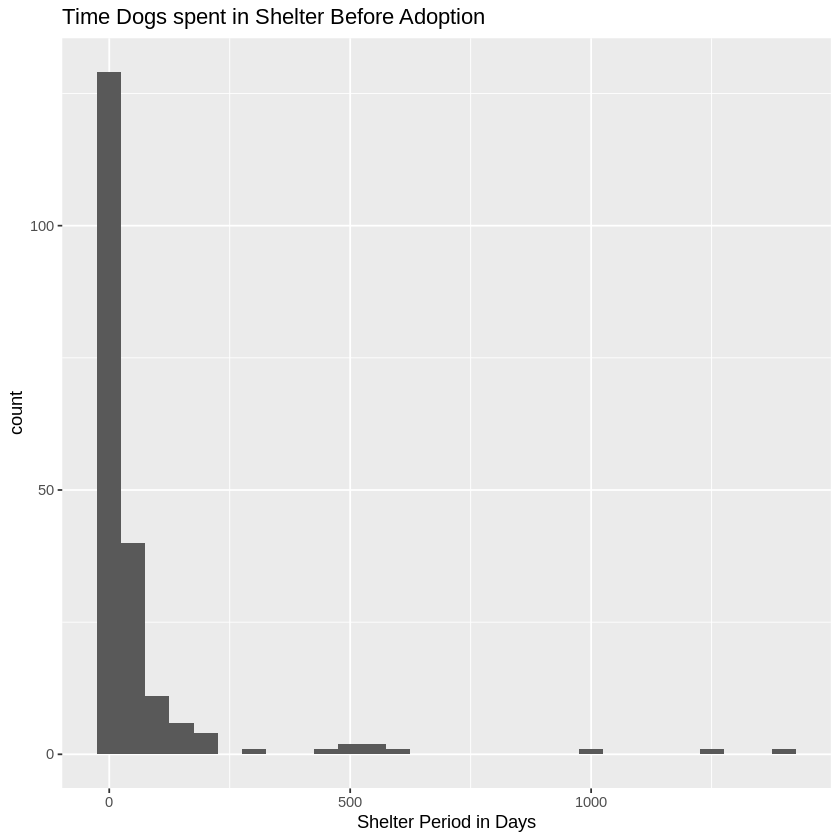

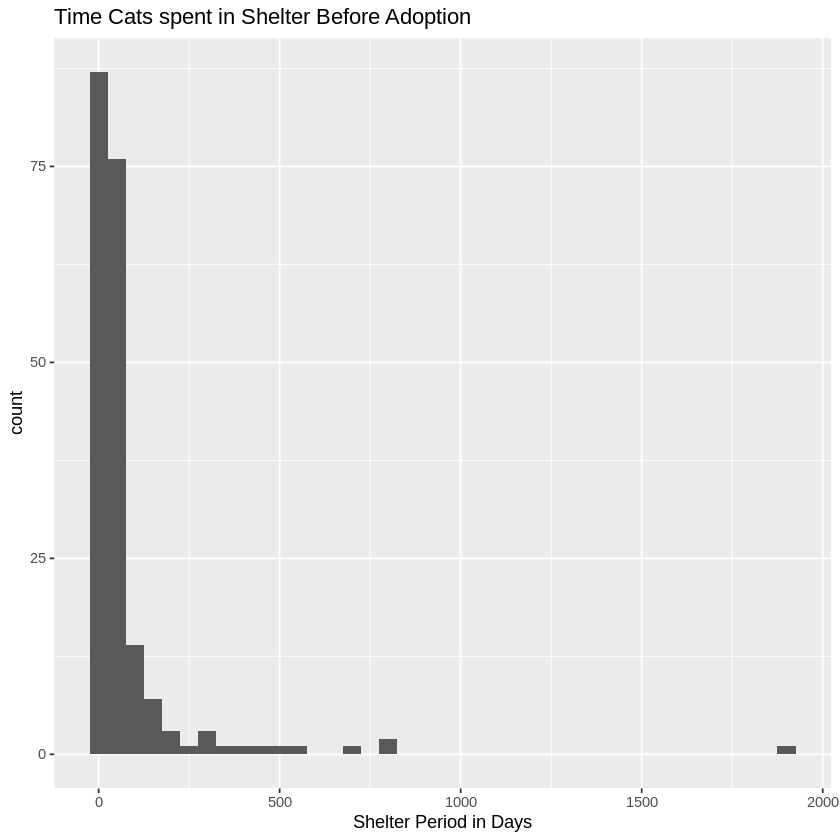

In [14]:
set.seed(310)

# cat_sample <- adoption_time_data %>%
#     filter(Animal_Type == "Cat") %>%
#     select(Shelter_Period) %>%
#     rep_sample_n(size = 200)

# head(cat_sample)
    

# Get datasets filtered by species
adoption_time_data_dog <- adoption_time_data %>%
    filter(Animal_Type == "Dog")

adoption_time_data_cat <- adoption_time_data %>%
    filter(Animal_Type == "Cat")

# Dog: Sample (size 200)
dog_sample_200 <- adoption_time_data_dog %>%
    rep_sample_n(size = 200) 

head(dog_sample_200)

# Cat: Sample (size 200)
cat_sample_200 <- adoption_time_data_cat %>%
    rep_sample_n(size = 200) 

# Dog: Sample200 histogram
animal_sample200_dog_dist <- dog_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Dogs spent in Shelter Before Adoption")
animal_sample200_dog_dist

# # Cat: Sample200 histogram
animal_sample200_cat_dist <- cat_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Cats spent in Shelter Before Adoption")
animal_sample200_cat_dist